[Reference](http://uribo.hatenablog.com/entry/2016/03/27/070000)

## データの確認と簡単な分析

In [2]:
library(dplyr)
data("gapminder", package = "gapminder")
# データセットの変数の型を把握する
gapminder %>% glimpse()

Observations: 1,704
Variables: 6
$ country   <fctr> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgh...
$ continent <fctr> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, As...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


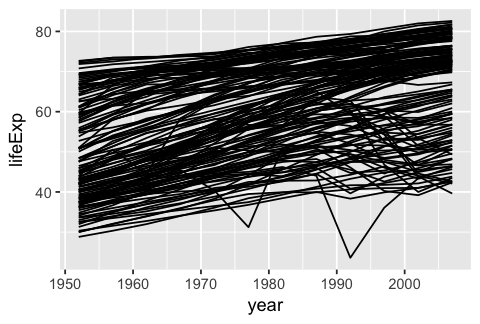

In [3]:
library(ggplot2) ; options(repr.plot.width=4, repr.plot.height=2.7)
gapminder %>% ggplot(aes(year, lifeExp, group = country)) + 
    geom_line()

カテゴリー変数を用いてデータを入れ子構造に内包する

In [4]:
library(tidyr)
nest_by_country <- gapminder %>% 
  group_by(continent, country) %>% 
  nest()

In [5]:
glimpse(nest_by_country)

Observations: 142
Variables: 3
$ continent <fctr> Asia, Europe, Africa, Africa, Americas, Oceania, Europe,...
$ country   <fctr> Afghanistan, Albania, Algeria, Angola, Argentina, Austra...
$ data      <list> [<c("1952", "1957", "1962", "1967", "1972", "1977", "198...


In [6]:
head(nest_by_country,2)

continent,country,data
Asia,Afghanistan,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Europe,Albania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"


In [7]:
# 日本のデータは次の位置に格納されている
JapanID <- gapminder$country %>% factor() %>% levels() %>% grep("Japan", .)

In [8]:
nest_by_country$data[[JapanID]]

year,lifeExp,pop,gdpPercap
1952,63.030,86459025,3216.956
1957,65.500,91563009,4317.694
1962,68.730,95831757,6576.649
1967,71.430,100825279,9847.789
1972,73.420,107188273,14778.786
1977,75.380,113872473,16610.377
1982,77.110,118454974,19384.106
1987,78.670,122091325,22375.942
1992,79.360,124329269,26824.895
1997,80.690,125956499,28816.585


In [9]:
library(broom) # for tidy()

In [10]:
nest_by_country$data[[JapanID]] %>% lm(lifeExp ~ year, data = .) %>% tidy()

term,estimate,std.error,statistic,p.value
(Intercept),-623.7469389,45.33137200,-13.75972,7.989525e-08
year,0.3529042,0.02289954,15.41097,2.695784e-08


## broomパッケージによる可視化

{broom}パッケージはRの統計解析用の関数の出力を整形し、利用者が再利用しやすい形（data.frame）で出力する

In [11]:
do_by_country <- gapminder %>% 
  group_by(country) %>% 
  do(data = lm(lifeExp ~ year, data = .) %>% tidy())

In [12]:
head(do_by_country, 2)

country,data
Afghanistan,"(Intercept) , year , -507.534271561781 , 0.275328671328676 , 40.4841619544564 , 0.0204509335898222 , -12.5366130125836 , 13.462890098362 , 1.93405534425528e-07, 9.83521290305788e-08"
Albania,"(Intercept) , year , -594.072510955719 , 0.334683216783221 , 65.6553590624551 , 0.033166387129681 , -9.04834760541944 , 10.0910363095807 , 3.94333729125249e-06, 1.46276319026214e-06"


In [13]:
do_by_country %>% unnest() %>% head(., 5)

country,term,estimate,std.error,statistic,p.value
Afghanistan,(Intercept),-507.5342716,40.48416195,-12.536613,1.934055e-07
Afghanistan,year,0.2753287,0.02045093,13.462890,9.835213e-08
Albania,(Intercept),-594.0725110,65.65535906,-9.048348,3.943337e-06
Albania,year,0.3346832,0.03316639,10.091036,1.462763e-06
Algeria,(Intercept),-1067.8590396,43.80220084,-24.379118,3.074007e-10


## purrrを使った記法

In [16]:
library(purrr)
map_by_country <- gapminder %>% 
  split(.$country) %>% 
  map(., ~ lm(lifeExp ~ year, data = .) %>% tidy())

In [15]:
map_by_country %>% head(., 3)

term,estimate,std.error,statistic,p.value
(Intercept),-507.5342716,40.48416195,-12.53661,1.934055e-07
year,0.2753287,0.02045093,13.46289,9.835213e-08
term,estimate,std.error,statistic,p.value
(Intercept),-594.0725110,65.65535906,-9.048348,3.943337e-06
year,0.3346832,0.03316639,10.091036,1.462763e-06
term,estimate,std.error,statistic,p.value
(Intercept),-1067.8590396,43.80220084,-24.37912,3.074007e-10
year,0.5692797,0.02212707,25.72775,1.808143e-10
